In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
df.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [4]:
df.shape

(517754, 14)

In [5]:
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts())

road_type
highway    173672
rural      172719
urban      171363
Name: count, dtype: int64
lighting
dim         183826
daylight    178015
night       155913
Name: count, dtype: int64
weather
foggy    181463
clear    179306
rainy    156985
Name: count, dtype: int64
time_of_day
morning      173410
evening      172837
afternoon    171507
Name: count, dtype: int64


In [6]:
for col in df.select_dtypes(include='boolean').columns:
    print(df[col].value_counts())

road_signs_present
False    259289
True     258465
Name: count, dtype: int64
public_road
True     260045
False    257709
Name: count, dtype: int64
holiday
True     260688
False    257066
Name: count, dtype: int64
school_season
False    260164
True     257590
Name: count, dtype: int64


In [7]:
df.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [8]:


df.isnull().mean()*100

id                        0.0
road_type                 0.0
num_lanes                 0.0
curvature                 0.0
speed_limit               0.0
lighting                  0.0
weather                   0.0
road_signs_present        0.0
public_road               0.0
time_of_day               0.0
holiday                   0.0
school_season             0.0
num_reported_accidents    0.0
accident_risk             0.0
dtype: float64

In [9]:
num_cols=df.select_dtypes(include='number').columns
num_cols

Index(['id', 'num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents',
       'accident_risk'],
      dtype='object')

In [10]:
df.describe()

,id,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk
count,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000
mean,258876.500000,2.491511,0.488719,46.112575,1.187970,0.352377
std,149462.849975,1.120434,0.272563,15.788521,0.895961,0.166417
min,0.000000,1.000000,0.000000,25.000000,0.000000,0.000000
25%,129438.250000,1.000000,0.260000,35.000000,1.000000,0.230000
50%,258876.500000,2.000000,0.510000,45.000000,1.000000,0.340000
75%,388314.750000,3.000000,0.710000,60.000000,2.000000,0.460000
max,517753.000000,4.000000,1.000000,70.000000,7.000000,1.000000


In [11]:
# for col in num_cols:
#     plt.figure(figsize=(10,12))
#     plt.subplot(221)
#     sns.distplot(df[col])
#     plt.subplot(222)
#     sns.boxplot(df[col])

In [39]:
def remove_outliers(df,col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower,upper=Q1-IQR*1.5,Q3+IQR*1.5
    df=df[(df[col]>=lower) & (df[col]<=upper)]
    return df

In [13]:
df.drop(columns=['id'],inplace=True)

<Axes: xlabel='accident_risk'>

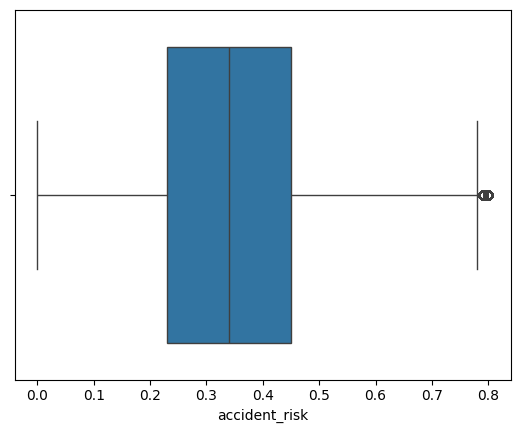

In [14]:
sns.boxplot(x=df['accident_risk'])

In [42]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [43]:
x = df.drop(columns=['accident_risk'])
y = df['accident_risk']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [44]:
x_train.columns

Index(['road_type', 'num_lanes', 'curvature', 'speed_limit', 'lighting',
       'weather', 'road_signs_present', 'public_road', 'time_of_day',
       'holiday', 'school_season', 'num_reported_accidents'],
      dtype='object')

<Axes: xlabel='accident_risk'>

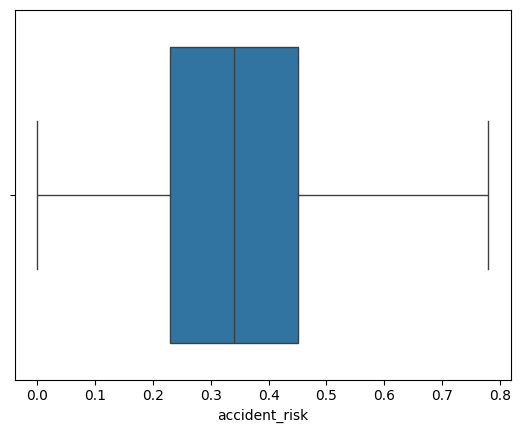

In [50]:
sns.boxplot(x=y_train)

In [51]:
x_train.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
459337,highway,1,0.70,45,night,rainy,False,False,afternoon,True,False,1
253931,rural,4,0.80,45,dim,rainy,True,False,evening,False,False,3
480049,rural,2,0.88,60,dim,foggy,False,False,morning,True,True,2
62462,rural,2,0.87,45,daylight,rainy,True,True,afternoon,True,False,3
346959,urban,4,0.24,60,daylight,rainy,True,True,morning,True,False,2


In [52]:
ohe_cols=['road_type','lighting','weather','time_of_day']
oe_cols=['road_signs_present','public_road','holiday','school_season']

In [53]:
speed_limit_trf=(
    'speed_limit_trf',Pipeline([
        ('scaling',StandardScaler())
    ]),['speed_limit']
)
ohe_trf=(
    'ohe_',Pipeline([
        ('ohe_trf',OneHotEncoder(handle_unknown='ignore'))
    ]),ohe_cols
)
oe_trf=(
    'oe_',Pipeline([
        ('oe_trf',OrdinalEncoder())
    ]),oe_cols
)

In [54]:
transformer=ColumnTransformer(transformers=[speed_limit_trf,ohe_trf,oe_trf],remainder='passthrough')

In [55]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import SGDRegressor,Lasso
from sklearn.metrics import root_mean_squared_error

In [22]:
rfr=RandomForestRegressor(random_state=42)
pipe1=Pipeline([
    ('transformer',transformer),
    ('clf',rfr)
])

In [23]:
pipe1.fit(x_train,y_train)

,steps,"[('transformer', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('speed_limit_trf', ...), ('ohe_', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [24]:
y_pred=pipe1.predict(x_test)
root_mean_squared_error(y_test,y_pred)

0.05835285430341002

In [56]:
xgb=XGBRegressor(random_state=42)
pipe2=Pipeline([
    ('transformer',transformer),
    ('clf',xgb)
])
pipe2.fit(x_train,y_train)
y_pred=pipe2.predict(x_test)
root_mean_squared_error(y_test,y_pred)

0.05523991278140739

In [26]:
param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [3, 5, 7],
    'clf__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'clf__subsample': [0.6, 0.8, 1.0],
    'clf__colsample_bytree': [0.6, 0.8, 1.0],
    'clf__gamma': [0, 1, 5]
}

xgb = XGBRegressor(use_label_encoder=False, eval_metric='logloss')

pipe_xgb_grid = Pipeline([
    ('transform', transformer),
    ('clf', xgb)
])

grid_xgb = GridSearchCV(
    estimator=pipe_xgb_grid,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

grid_xgb.fit(x_train, y_train)

y_pred = grid_xgb.predict(x_test)
root_mean_squared_error(y_test,y_pred)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


0.05511590505642426

In [33]:
grid_xgb.best_params_

{'clf__colsample_bytree': 1.0,
 'clf__gamma': 0,
 'clf__learning_rate': 0.05,
 'clf__max_depth': 7,
 'clf__n_estimators': 200,
 'clf__subsample': 0.8}

In [57]:
xgb=XGBRegressor(colsample_bytree= 1.0,
 gamma= 0,
 learning_rate= 0.05,
 max_depth= 7,
 n_estimators= 200,
 subsample= 0.8,random_state=42)
pipe2=Pipeline([
    ('transformer',transformer),
    ('clf',xgb)
])
pipe2.fit(x_train,y_train)
y_pred=pipe2.predict(x_test)
root_mean_squared_error(y_test,y_pred)

0.055138400691078185

In [29]:


lgb = LGBMRegressor(random_state=42)
pipe3=Pipeline([
    ('transformer',transformer),
    ('clf',lgb)
])
pipe3.fit(x_train,y_train)
y_pred=pipe3.predict(x_test)
root_mean_squared_error(y_test,y_pred)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 183
[LightGBM] [Info] Number of data points in the train set: 411509, number of used features: 20
[LightGBM] [Info] Start training from score 0.349098


0.0552909550534874

In [30]:

param_grid = {
    'clf__num_leaves': [31, 50, 70],
    'clf__max_depth': [-1, 10, 20],
    'clf__learning_rate': [0.01, 0.05, 0.1],
    'clf__n_estimators': [100, 200, 500],
    'clf__min_child_samples': [10, 20, 30],
    'clf__subsample': [0.6, 0.8, 1.0]
}

lgb = LGBMRegressor(
    device_type='gpu',
    gpu_platform_id=0,
    gpu_device_id=0
)
pipe_lgb_grid=Pipeline([
    ('transformer',transformer),
    ('clf',lgb)
])

grid_lgb = GridSearchCV(
    estimator=pipe_lgb_grid,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

grid_lgb.fit(x_train, y_train)


y_pred = grid_lgb.predict(x_test)
root_mean_squared_error(y_test,y_pred)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 181
[LightGBM] [Info] Number of data points in the train set: 411509, number of used features: 20
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3050 Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 12 dense feature groups (4.71 MB) transferred to GPU in 0.009963 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.349098


0.0551500153419609

In [34]:
grid_lgb.best_params_

{'clf__learning_rate': 0.05,
 'clf__max_depth': -1,
 'clf__min_child_samples': 10,
 'clf__n_estimators': 500,
 'clf__num_leaves': 70,
 'clf__subsample': 1.0}

### Submission


In [49]:
test.drop(columns=['id'],inplace=True)

In [50]:
test.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
0,highway,2,0.34,45,night,clear,True,True,afternoon,True,True,1
1,urban,3,0.04,45,dim,foggy,True,False,afternoon,True,False,0
2,urban,2,0.59,35,dim,clear,True,False,afternoon,True,True,1
3,rural,4,0.95,35,daylight,rainy,False,False,afternoon,False,False,2
4,highway,2,0.86,35,daylight,clear,True,False,evening,False,True,3


In [ ]:
#randomForest
y_test_sub=pd.read_csv('sample_submission.csv')
test_preds = pipe1.predict(test)
submission = y_test_sub.copy()
submission['accident_risk'] = test_preds
submission.to_csv('final_submission_rfr.csv', index=False)
print("Successfull!")

In [59]:
#xgb
y_test_sub=pd.read_csv('sample_submission.csv')
test_preds = pipe2.predict(test)
submission = y_test_sub.copy()
submission['accident_risk'] = test_preds
submission.to_csv('final_submission_xgb.csv', index=False)
print("Successfull!")

Successfull!


In [60]:
#light
y_test_sub=pd.read_csv('sample_submission.csv')
test_preds = pipe3.predict(test)
submission = y_test_sub.copy()
submission['accident_risk'] = test_preds
submission.to_csv('final_submission_lgb.csv', index=False)
print("Successfull!")

Successfull!
